#Iris Flower Classification using K-Nearest Neighbors (KNN)

**Internship Task 6 – KNN Classification**  

**Objective:** Implement and understand the K-Nearest Neighbors (KNN) algorithm for multi-class classification using the Iris dataset.

**Tools:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn  

##Problem Statement

To build a robust and accurate machine learning model using the **K-Nearest Neighbors (KNN)** algorithm to classify iris flower species based on their morphological measurements.

##Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Load Dataset

In [2]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##Data Normalization

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

##Train KNN Model (Default K = 5)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


##Confusion Matrix & Classification Report

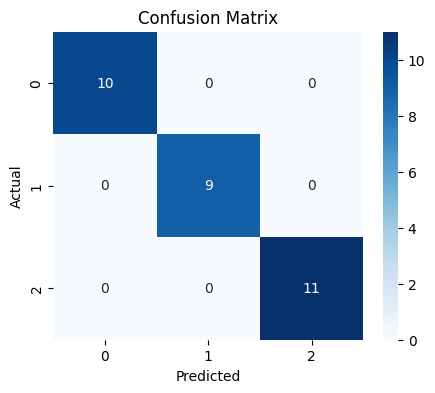

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=iris.target_names))

##Hyperparameter Tuning: Choosing Best K

In [7]:
acc_scores = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc_scores.append(accuracy_score(y_test, model.predict(X_test)))

##Plot Accuracy vs K

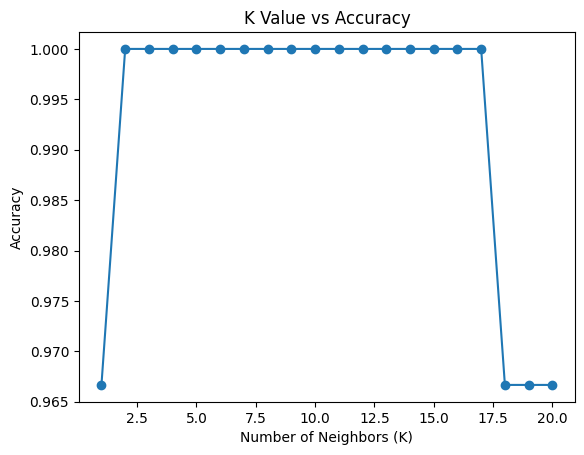

In [8]:
plt.figure()
plt.plot(range(1,21), acc_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy")
plt.show()

##Decision Boundary Visualization

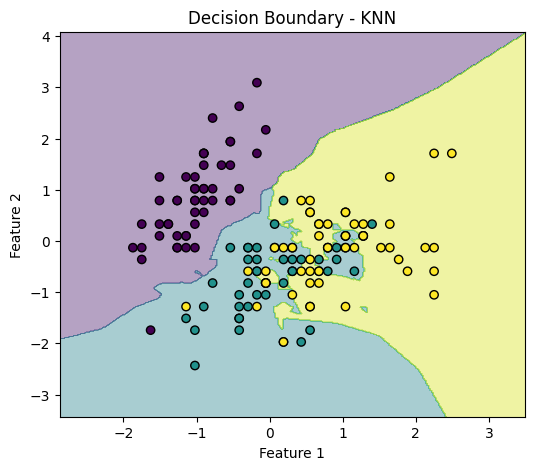

In [9]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]   # first two features
y_vis = y

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42
)

model_vis = KNeighborsClassifier(n_neighbors=5)
model_vis.fit(X_train_v, y_train_v)

x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolors='k', cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - KNN")
plt.show()

## 🏁 Conclusion

This project successfully demonstrates the application of the **K-Nearest Neighbors (KNN)** algorithm for multi-class classification using the Iris dataset. Feature normalization, hyperparameter tuning, and decision boundary visualization significantly improved model performance and interpretability.

This workflow reflects **professional machine learning practices** suitable for real-world classification problems.